<a href="https://colab.research.google.com/github/Veny1302/Analisis-Sentimen-MBG/blob/main/makanbergizigratis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from wordcloud import WordCloud
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import folium
from folium.plugins import HeatMap
import requests
from PIL import Image
from io import BytesIO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Define the filename
filename = "makanbergizigratis.csv"

# Specify the path to your CSV file
# Adjusting the path to where 'mbg.csv' is actually located.
file_path = f"/content/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988024872963109143,Mon Nov 10 23:24:00 +0000 2025,0,Program MBG untuk anak Indonesia sehat dan cer...,1988024872963109143,https://pbs.twimg.com/media/G5biFiJasAAzwQT.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198802487296310...,1580097278475280384,NaN
1,1987837720790495527,Mon Nov 10 11:00:19 +0000 2025,0,Wapres Gibran perkuat Program Makan Bergizi Gr...,1987837720790495527,https://pbs.twimg.com/media/G5Y33ydXcAAOlVK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198783772079049...,1182569685981659136,NaN
2,1987818612997095818,Mon Nov 10 09:44:23 +0000 2025,1,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,1987818612997095818,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781861299709...,859471627108499456,NaN
3,1987810228944110060,Mon Nov 10 09:11:04 +0000 2025,1,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,1987810228944110060,https://pbs.twimg.com/media/G5Ye3jxbYAA-esg.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781022894411...,1852436707796545536,NaN
4,1987795274442657868,Mon Nov 10 08:11:39 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795274442657868,https://pbs.twimg.com/media/G5YRQl-aUAA0mK9.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779527444265...,1713751914977120256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,1971424750141612395,Fri Sep 26 04:01:02 +0000 2025,0,Program Makan Bergizi Gratis membuat generasi ...,1971424750141612395,https://pbs.twimg.com/media/G1voW10bEAAinQl.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/197142475014161...,1603264295051022336,NaN
3009,1971423065939779909,Fri Sep 26 03:54:20 +0000 2025,0,#Dpr #mbg #keracunanmbg #cipongkor #dadanhinda...,1971423065939779909,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197142306593977...,994510171,NaN
3010,1971181108604830023,Fri Sep 26 03:46:11 +0000 2025,0,Program Makan Bergizi Gratis mantul #ManfaatMa...,1971421015180968086,NaN,Korea_K3BBQ,in,NaN,0,0,0,https://x.com/undefined/status/197142101518096...,1537011663773528064,NaN
3011,1971181108604830023,Fri Sep 26 03:46:07 +0000 2025,0,terus mendukungProgram Makan Bergizi Gratis #M...,1971420995862003761,NaN,Korea_K3BBQ,in,NaN,0,0,0,https://x.com/undefined/status/197142099586200...,1537011663773528064,NaN


In [3]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 3013.


In [4]:
import pandas as pd
df = pd.read_csv("/content/makanbergizigratis.csv")
df.head(6)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988024872963109143,Mon Nov 10 23:24:00 +0000 2025,0,Program MBG untuk anak Indonesia sehat dan cer...,1988024872963109143,https://pbs.twimg.com/media/G5biFiJasAAzwQT.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198802487296310...,1580097278475280384,NaN
1,1987837720790495527,Mon Nov 10 11:00:19 +0000 2025,0,Wapres Gibran perkuat Program Makan Bergizi Gr...,1987837720790495527,https://pbs.twimg.com/media/G5Y33ydXcAAOlVK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198783772079049...,1182569685981659136,NaN
2,1987818612997095818,Mon Nov 10 09:44:23 +0000 2025,1,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,1987818612997095818,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781861299709...,859471627108499456,NaN
3,1987810228944110060,Mon Nov 10 09:11:04 +0000 2025,1,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,1987810228944110060,https://pbs.twimg.com/media/G5Ye3jxbYAA-esg.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781022894411...,1852436707796545536,NaN
4,1987795274442657868,Mon Nov 10 08:11:39 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795274442657868,https://pbs.twimg.com/media/G5YRQl-aUAA0mK9.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779527444265...,1713751914977120256,NaN
5,1987795225671303455,Mon Nov 10 08:11:27 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795225671303455,https://pbs.twimg.com/media/G5YRN-GaYAA5V4_.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779522567130...,1713751914977120256,NaN


In [5]:
# Check for missing values in each column of df
print("Missing values in df:")
display(df.isnull().sum())

# Check for duplicate rows in df
print("\nNumber of duplicate rows in df:")
display(df.duplicated().sum())

Missing values in df:


,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,276
in_reply_to_screen_name,2659
lang,0
location,3013
quote_count,0



Number of duplicate rows in df:


np.int64(0)

In [6]:
import pandas as pd
df = pd.read_csv("/content/makanbergizigratis.csv")
df = df[['created_at', 'full_text','username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()
df

,date,tweet,username
0,Mon Nov 10 23:24:00 +0000 2025,Program MBG untuk anak Indonesia sehat dan cer...,NaN
1,Mon Nov 10 11:00:19 +0000 2025,Wapres Gibran perkuat Program Makan Bergizi Gr...,NaN
2,Mon Nov 10 09:44:23 +0000 2025,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,NaN
3,Mon Nov 10 09:11:04 +0000 2025,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,NaN
4,Mon Nov 10 08:11:39 +0000 2025,Program Makan Bergizi Gratis memberikan energi...,NaN
...,...,...,...
3008,Fri Sep 26 04:01:02 +0000 2025,Program Makan Bergizi Gratis membuat generasi ...,NaN
3009,Fri Sep 26 03:54:20 +0000 2025,#Dpr #mbg #keracunanmbg #cipongkor #dadanhinda...,NaN
3010,Fri Sep 26 03:46:11 +0000 2025,Program Makan Bergizi Gratis mantul #ManfaatMa...,NaN
3011,Fri Sep 26 03:46:07 +0000 2025,terus mendukungProgram Makan Bergizi Gratis #M...,NaN


In [7]:
# Menghapus baris yang mengandung nilai NaN
df_clean = df.dropna()

# Menghitung jumlah tweet setelah penghapusan NaN
jumlah_tweet_clean = df_clean["tweet"].count()
print(f"Jumlah tweet setelah menghapus NaN: {jumlah_tweet_clean}")

# Menghitung jumlah data NaN setelah penghapusan, seharusnya 0
jumlah_nan_clean = df_clean.isnull().sum().sum()
print(f"Jumlah data NaN setelah penghapusan: {jumlah_nan_clean}")

Jumlah tweet setelah menghapus NaN: 0
Jumlah data NaN setelah penghapusan: 0


In [8]:
df = pd.DataFrame(df[['tweet']])
df.head()

,tweet
0,Program MBG untuk anak Indonesia sehat dan cer...
1,Wapres Gibran perkuat Program Makan Bergizi Gr...
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...
4,Program Makan Bergizi Gratis memberikan energi...


### PROSES HAPUS DATA DUPLIKAT

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   3013 non-null   object
dtypes: object(1)
memory usage: 23.7+ KB


In [10]:
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 3012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2999 non-null   object
dtypes: object(1)
memory usage: 46.9+ KB


###WORDCLOUD SEBELUM PREPROCESSING

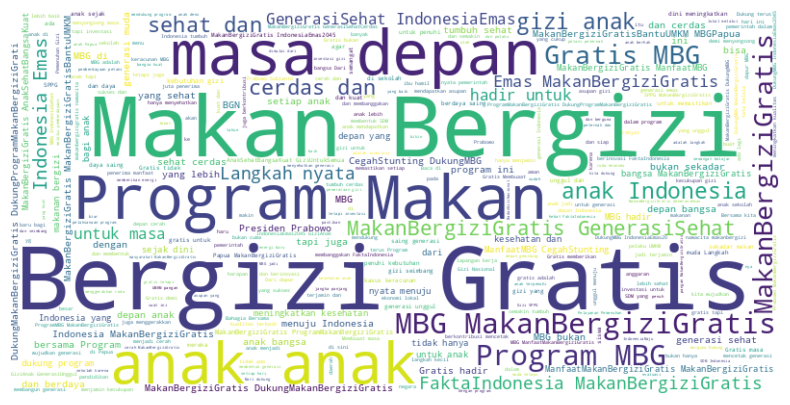

In [11]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['tweet']= df['tweet'].fillna('')

text = ''.join(df['tweet'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x'])

wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

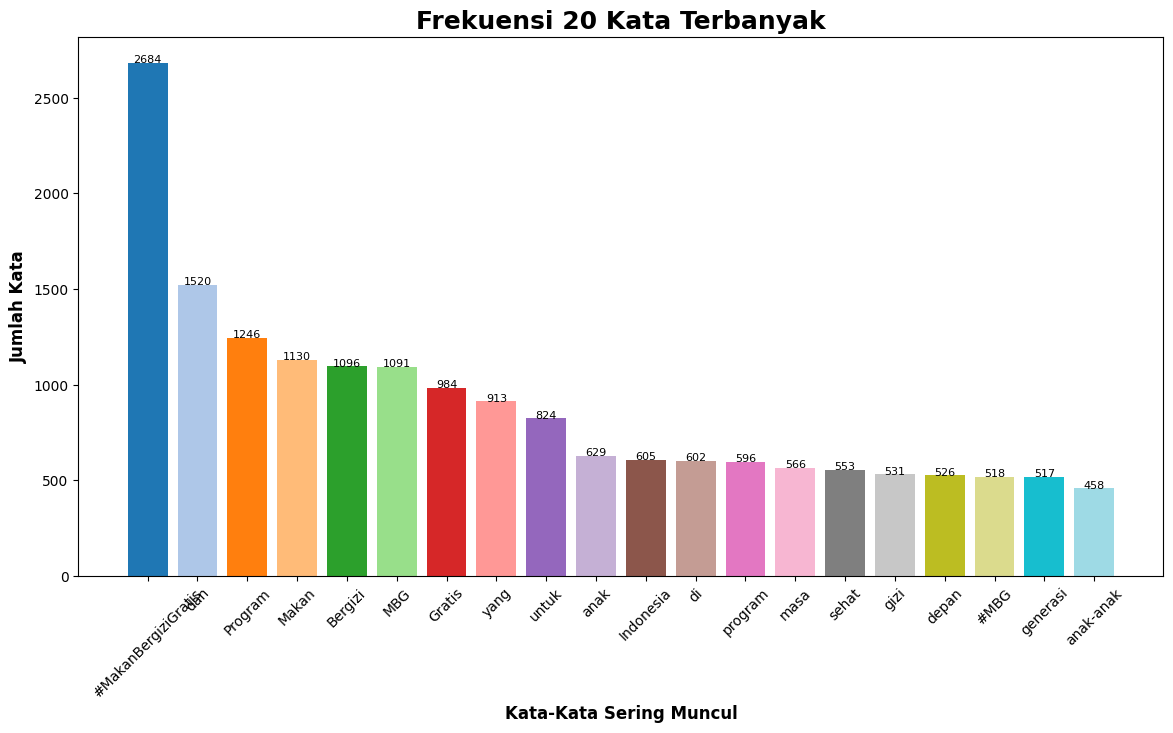

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["tweet"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata paling sering muncul
top_words = word_counts.most_common(20)
word, count = zip(*top_words)

colors = plt.cm.tab20(range(len(word)))

plt.figure(figsize=(14, 7))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi 20 Kata Terbanyak", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        num + 1,
        str(num),
        fontsize=8,
        color='black',
        ha='center'
    )

plt.show()


In [13]:
!pip install Sastrawi

import pandas as pd
import numpy as np
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

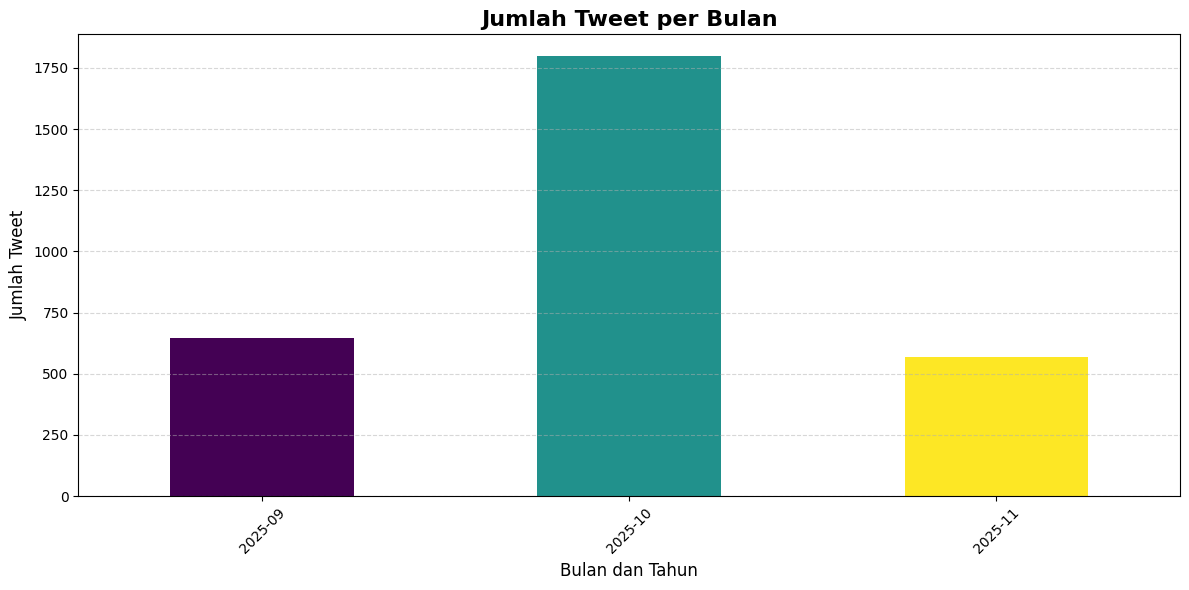

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load df and process it to ensure 'date' column is present
df = pd.read_csv("/content/makanbergizigratis.csv")
df = df[['created_at', 'full_text', 'username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()

tweets = df.copy()

tweets['date'] = pd.to_datetime(
    tweets['date'],
    format='%a %b %d %H:%M:%S +0000 %Y'
)

tweets['YearMonth'] = tweets['date'].dt.to_period('M')

monthly_tweets = tweets.groupby('YearMonth').size()

colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))

# Plot grafik
plt.figure(figsize=(12, 6))
monthly_tweets.plot(kind='bar', color=colors)

plt.xlabel("Bulan dan Tahun", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.title("Jumlah Tweet per Bulan", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#PROSES PREPROCESSING DATA




###Cleaning

In [15]:
import pandas as pd
import re

# Ensure 'tweet' and 'cleaning' columns exist in df
# If 'full_text' is present and 'tweet' is not, rename 'full_text' to 'tweet'
if 'full_text' in df.columns and 'tweet' not in df.columns:
    df = df.rename(columns={'full_text': 'tweet'})

# If 'tweet' is present and 'cleaning' is not, create the 'cleaning' column
if 'tweet' in df.columns and 'cleaning' not in df.columns:
    df['cleaning'] = df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|@\w+|#\w+|\d+|[.,!?:;"\'\`\]\[()]', '', str(x) if pd.notna(x) else ''))

df_cleaned_text = df[['tweet', 'cleaning']]
display(df_cleaned_text.head(6))

,tweet,cleaning
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...
5,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...


###Casefolding

In [16]:
df['casefolding_cleaning'] = df['cleaning'].str.lower()
display(df[['tweet', 'cleaning', 'casefolding_cleaning']].head())

,tweet,cleaning,casefolding_cleaning
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...,program mbg untuk anak indonesia sehat dan cer...
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...,wapres gibran perkuat program makan bergizi gr...
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,anggota dpd ri lia istifhama mbg bukti nyata n...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,monitoring mbg sppg mitra mandiri al muslimun ...
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...,program makan bergizi gratis memberikan energi...


###Normalisasi kata

In [17]:
import pandas as pd

kamus_df = pd.read_excel('/content/kamuskatabaku.xlsx')
kamus_df.head()

,tidak baku,baku
0,gak,tidak
1,yg,yang
2,sm,sama
3,mkn,makan
4,skrg,sekarang


In [18]:
import pandas as pd
import re

# Ensure kamus_normalisasi is defined, as kamus_df should have been loaded by liYTga-tf3oL
try:
    kamus_normalisasi
except NameError:
    kamus_df = pd.read_excel('/content/kamuskatabaku.xlsx')
    kamus_normalisasi = dict(zip(kamus_df['tidak baku'], kamus_df['baku']))

# --- Step 3: Define the replace_taboo_words function ---
def replace_taboo_words(text, kamus):
    if not isinstance(text, str): # Handle non-string inputs gracefully
        return text, [], [], []

    tokens = text.split()
    normalized_tokens = []
    kata_baku_list = []
    kata_tidak_baku_list = []
    kata_tidak_baku_hash_list = []

    for token in tokens:
        # Check if the word is in the dictionary (case-insensitive for lookup, but replace with exact baku form)
        normalized_word = kamus.get(token.lower(), token) # Use .get to return original token if not found
        normalized_tokens.append(normalized_word)

        if token.lower() in kamus: # If it was a non-baku word that got normalized
            kata_tidak_baku_list.append(token)
            kata_baku_list.append(normalized_word)
            kata_tidak_baku_hash_list.append(f'{token}#{normalized_word}')

    return ' '.join(normalized_tokens), kata_baku_list, kata_tidak_baku_list, kata_tidak_baku_hash_list

# --- Step 4: Apply the function to the 'casefolding_cleaning' column ---
# Assuming df already has 'casefolding_cleaning' from previous steps
df['hasil_normalisasi'], df['Kata_Baku'], df['Kata_Tidak_Baku'], df['Kata_Tidak_Baku_Hash'] = zip(
    *df['casefolding_cleaning'].apply(lambda x: replace_taboo_words(x, kamus_normalisasi))
)

# Display the results
display(df[['tweet', 'cleaning', 'casefolding_cleaning', 'hasil_normalisasi']].head())

,tweet,cleaning,casefolding_cleaning,hasil_normalisasi
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...,program mbg untuk anak indonesia sehat dan cer...,program makan bergizi gratis untuk anak indone...
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...,wapres gibran perkuat program makan bergizi gr...,wapres gibran perkuat program makan bergizi gr...
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,anggota dpd ri lia istifhama mbg bukti nyata n...,anggota dpd republik indonesia lia istifhama m...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,monitoring mbg sppg mitra mandiri al muslimun ...,monitoring makan bergizi gratis sppg mitra man...
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...,program makan bergizi gratis memberikan energi...,program makan bergizi gratis memberikan energi...


###Tokenize

In [19]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['hasil_normalisasi'].apply(tokenize)
display(df[['tweet', 'cleaning', 'casefolding_cleaning', 'hasil_normalisasi', 'tokenize']].head())


,tweet,cleaning,casefolding_cleaning,hasil_normalisasi,tokenize
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...,program mbg untuk anak indonesia sehat dan cer...,program makan bergizi gratis untuk anak indone...,"[program, makan, bergizi, gratis, untuk, anak,..."
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...,wapres gibran perkuat program makan bergizi gr...,wapres gibran perkuat program makan bergizi gr...,"[wapres, gibran, perkuat, program, makan, berg..."
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,anggota dpd ri lia istifhama mbg bukti nyata n...,anggota dpd republik indonesia lia istifhama m...,"[anggota, dpd, republik, indonesia, lia, istif..."
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,monitoring mbg sppg mitra mandiri al muslimun ...,monitoring makan bergizi gratis sppg mitra man...,"[monitoring, makan, bergizi, gratis, sppg, mit..."
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...,program makan bergizi gratis memberikan energi...,program makan bergizi gratis memberikan energi...,"[program, makan, bergizi, gratis, memberikan, ..."


###Stop Removal

In [20]:
!pip install Sastrawi

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import requests

# Load custom stopword list from a URL
# This URL provides a more comprehensive list than the default Sastrawi list.
url_stopwords = "https://raw.githubusercontent.com/stopwords/id/master/id.txt"
response = requests.get(url_stopwords)
custom_stopwords = response.text.splitlines()

# Extend Sastrawi's default stopword list with custom stopwords
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()
all_stopwords = set(stopwords_sastrawi + custom_stopwords)

def remove_stopwords(text_tokens):
    if isinstance(text_tokens, list):
        return [word for word in text_tokens if word not in all_stopwords]
    return []

# Let's re-tokenize 'hasil_normalisasi' to be safe, as normalized_text might not be a list of tokens
df['tokenized_normalized_text'] = df['hasil_normalisasi'].apply(lambda x: x.split() if isinstance(x, str) else [])
df['stopword_removed'] = df['tokenized_normalized_text'].apply(remove_stopwords)

display(df[['tweet', 'cleaning', 'casefolding_cleaning', 'hasil_normalisasi', 'tokenize', 'stopword_removed']].head())

,tweet,cleaning,casefolding_cleaning,hasil_normalisasi,tokenize,stopword_removed
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...,program mbg untuk anak indonesia sehat dan cer...,program makan bergizi gratis untuk anak indone...,"[program, makan, bergizi, gratis, untuk, anak,...","[program, makan, bergizi, gratis, anak, indone..."
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...,wapres gibran perkuat program makan bergizi gr...,wapres gibran perkuat program makan bergizi gr...,"[wapres, gibran, perkuat, program, makan, berg...","[wapres, gibran, perkuat, program, makan, berg..."
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,anggota dpd ri lia istifhama mbg bukti nyata n...,anggota dpd republik indonesia lia istifhama m...,"[anggota, dpd, republik, indonesia, lia, istif...","[anggota, dpd, republik, indonesia, lia, istif..."
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,monitoring mbg sppg mitra mandiri al muslimun ...,monitoring makan bergizi gratis sppg mitra man...,"[monitoring, makan, bergizi, gratis, sppg, mit...","[monitoring, makan, bergizi, gratis, sppg, mit..."
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...,program makan bergizi gratis memberikan energi...,program makan bergizi gratis memberikan energi...,"[program, makan, bergizi, gratis, memberikan, ...","[program, makan, bergizi, gratis, memberikan, ..."


###Stemming

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(tokens):
    if isinstance(tokens, list):
        stemmed_words = [stemmer.stem(word) for word in tokens]
        return " ".join(stemmed_words) # Join the list of stemmed words into a single string
    return "" # Return an empty string if input is not a list

df['stemming_data'] = df['stopword_removed'].apply(stem_text)

display(df[['tweet', 'cleaning', 'casefolding_cleaning', 'hasil_normalisasi', 'tokenize', 'stopword_removed', 'stemming_data']].head())

,tweet,cleaning,casefolding_cleaning,hasil_normalisasi,tokenize,stopword_removed,stemming_data
0,Program MBG untuk anak Indonesia sehat dan cer...,Program MBG untuk anak Indonesia sehat dan cer...,program mbg untuk anak indonesia sehat dan cer...,program makan bergizi gratis untuk anak indone...,"[program, makan, bergizi, gratis, untuk, anak,...","[program, makan, bergizi, gratis, anak, indone...",program makan gizi gratis anak indonesia sehat...
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,Wapres Gibran perkuat Program Makan Bergizi Gr...,wapres gibran perkuat program makan bergizi gr...,wapres gibran perkuat program makan bergizi gr...,"[wapres, gibran, perkuat, program, makan, berg...","[wapres, gibran, perkuat, program, makan, berg...",wapres gibran kuat program makan gizi gratis l...
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,anggota dpd ri lia istifhama mbg bukti nyata n...,anggota dpd republik indonesia lia istifhama m...,"[anggota, dpd, republik, indonesia, lia, istif...","[anggota, dpd, republik, indonesia, lia, istif...",anggota dpd republik indonesia lia istifhama m...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,monitoring mbg sppg mitra mandiri al muslimun ...,monitoring makan bergizi gratis sppg mitra man...,"[monitoring, makan, bergizi, gratis, sppg, mit...","[monitoring, makan, bergizi, gratis, sppg, mit...",monitoring makan gizi gratis sppg mitra mandir...
4,Program Makan Bergizi Gratis memberikan energi...,Program Makan Bergizi Gratis memberikan energi...,program makan bergizi gratis memberikan energi...,program makan bergizi gratis memberikan energi...,"[program, makan, bergizi, gratis, memberikan, ...","[program, makan, bergizi, gratis, memberikan, ...",program makan gizi gratis beri energi baru ana...


###Proses Hapus Data Bernilai Kosong (NAN)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       3013 non-null   object 
 1   tweet                      3013 non-null   object 
 2   username                   0 non-null      float64
 3   cleaning                   3013 non-null   object 
 4   casefolding_cleaning       3013 non-null   object 
 5   hasil_normalisasi          3013 non-null   object 
 6   Kata_Baku                  3013 non-null   object 
 7   Kata_Tidak_Baku            3013 non-null   object 
 8   Kata_Tidak_Baku_Hash       3013 non-null   object 
 9   tokenize                   3013 non-null   object 
 10  tokenized_normalized_text  3013 non-null   object 
 11  stopword_removed           3013 non-null   object 
 12  stemming_data              3013 non-null   object 
dtypes: float64(1), object(12)
memory usage: 306.1+ K

In [24]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       0 non-null      object 
 1   tweet                      0 non-null      object 
 2   username                   0 non-null      float64
 3   cleaning                   0 non-null      object 
 4   casefolding_cleaning       0 non-null      object 
 5   hasil_normalisasi          0 non-null      object 
 6   Kata_Baku                  0 non-null      object 
 7   Kata_Tidak_Baku            0 non-null      object 
 8   Kata_Tidak_Baku_Hash       0 non-null      object 
 9   tokenize                   0 non-null      object 
 10  tokenized_normalized_text  0 non-null      object 
 11  stopword_removed           0 non-null      object 
 12  stemming_data              0 non-null      object 
dtypes: float64(1), object(12)
memory usage: 0.0+ bytes


###WORDCLOUD SETELAH PREPROCESSING

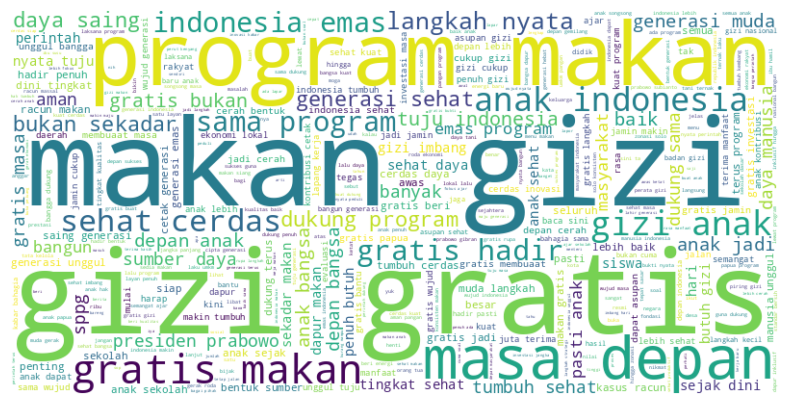

In [25]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# The previous steps have already processed the data and stored stemmed text in df['stemming_data'].
# We will use df directly instead of trying to load 'data_labeling.xlsx' which is not found.
# Ensure 'df' DataFrame is available and contains 'stemming_data' from previous preprocessing steps.

# Menggabungkan teks dari kolom 'stemming_data'
all_stemmed_words = []
# Using the 'stemming_data' column from the 'df' DataFrame
for text_entry in df['stemming_data']:
    if isinstance(text_entry, str):
        # Hilangkan petiknya
        text_entry = text_entry.replace("'", "").replace('"', "")
        all_stemmed_words.extend(text_entry.split())

    elif isinstance(text_entry, list):
        # Jika datanya list, hilangkan petik di tiap kata
        cleaned_list = [w.replace("'", "").replace('"', "") for w in text_entry]
        all_stemmed_words.extend(cleaned_list)

# Filter kata kosong
all_stemmed_words = [word for word in all_stemmed_words if word]

text = " ".join(all_stemmed_words)

# Stopwords
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', 'amp', 'lu', 'deh', 'fyp', 'ya',
    'gue', 'gak', 'ya', 'yg'
])

# WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

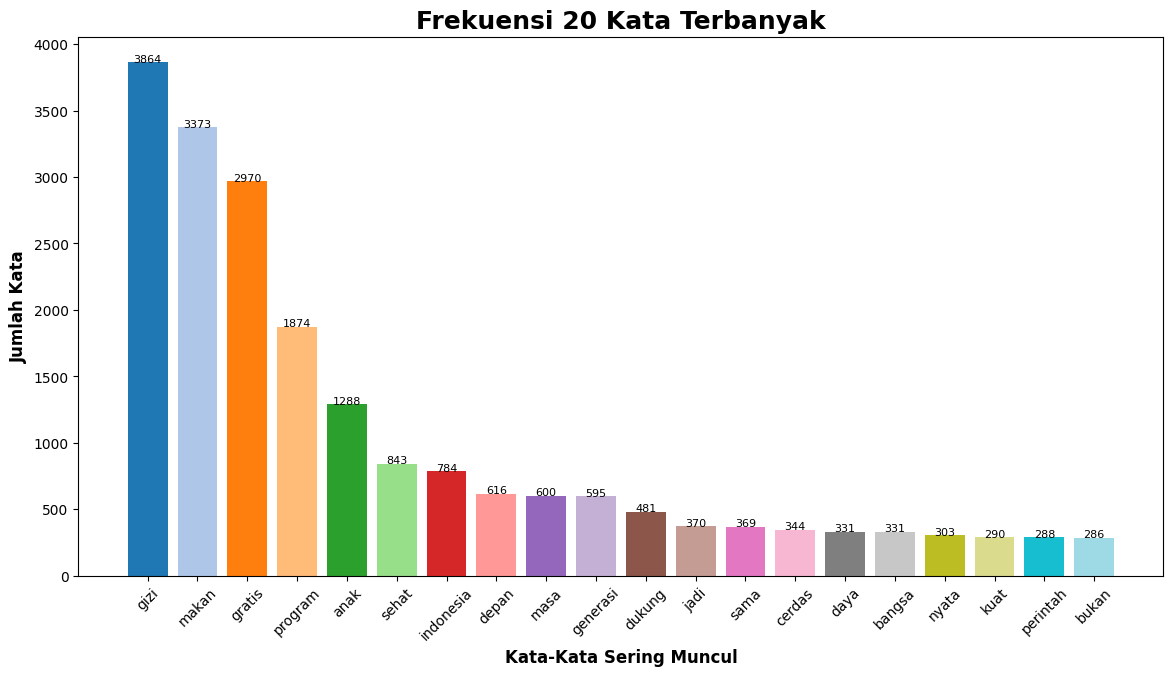

In [26]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

all_stemmed_words = []

for sublist in df['stemming_data']:
    if isinstance(sublist, str):
        all_stemmed_words.extend(sublist.split())
    elif isinstance(sublist, list):
        all_stemmed_words.extend(sublist)

text = " ".join(all_stemmed_words)
tokens = text.split()
word_counts = Counter(tokens)

stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "RT", "amp", "t", "x", "fyp", "lu", "yg"])

filtered_counts = {w: c for w, c in word_counts.items() if w not in stopwords}

# Ambil 20 kata paling sering muncul
top_words = sorted(filtered_counts.items(), key=lambda item: item[1], reverse=True)[:20]

if len(top_words) > 0:
    word, count = zip(*top_words)
else:
    print("⚠ Tidak ada kata untuk ditampilkan.")
    word, count = [], []

# Plot jika ada data
if len(word) > 0:
    colors = plt.cm.tab20(range(len(word)))

    plt.figure(figsize=(14, 7))
    bars = plt.bar(word, count, color=colors)

    plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
    plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.title("Frekuensi 20 Kata Terbanyak", fontsize=18, fontweight='bold')
    plt.xticks(rotation=45)

    # Label angka di atas bar
    for bar, num in zip(bars, count):
        plt.text(bar.get_x() + bar.get_width()/2, num + 1, str(num),
                 fontsize=8, color='black', ha='center')

    plt.show()
else:
    print("📌 Grafik tidak dibuat karena tidak ada kata yang valid.")


In [27]:
df.to_excel('data_preprocesing.xlsx', index=False)

#PELABELAN LEXICON BASED

In [28]:
import pandas as pd
data = pd.read_excel('/content/data_preprocesing.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       3013 non-null   object 
 1   tweet                      3013 non-null   object 
 2   username                   0 non-null      float64
 3   cleaning                   3013 non-null   object 
 4   casefolding_cleaning       3013 non-null   object 
 5   hasil_normalisasi          3013 non-null   object 
 6   Kata_Baku                  3013 non-null   object 
 7   Kata_Tidak_Baku            3013 non-null   object 
 8   Kata_Tidak_Baku_Hash       3013 non-null   object 
 9   tokenize                   3013 non-null   object 
 10  tokenized_normalized_text  3013 non-null   object 
 11  stopword_removed           3013 non-null   object 
 12  stemming_data              3013 non-null   object 
dtypes: float64(1), object(12)
memory usage: 306.1+ K

In [29]:
data = pd.DataFrame(data[['stemming_data']])
data.head()

,stemming_data
0,program makan gizi gratis anak indonesia sehat...
1,wapres gibran kuat program makan gizi gratis l...
2,anggota dpd republik indonesia lia istifhama m...
3,monitoring makan gizi gratis sppg mitra mandir...
4,program makan gizi gratis beri energi baru ana...


In [30]:
import pandas as pd
import requests

# ===============================
# 1. Unduh kamus positif & negatif InSet dari GitHub
# ===============================
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# ===============================
# 2. Fungsi untuk menentukan sentimen dan menghitung skor
# ===============================
def determine_sentiment(text):
    if isinstance(text, str):

        # Hitung jumlah kata positif & negatif
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)

        # Skor sentimen
        sentiment_score = positive_count - negative_count

        # Tentukan label sentimen
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment

    return 0, "Netral"

# Apply the function to the 'stemming_data' column
data[['sentiment_score', 'sentiment_label']] = data['stemming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
display(data.head())

,stemming_data,sentiment_score,sentiment_label
0,program makan gizi gratis anak indonesia sehat...,0,Netral
1,wapres gibran kuat program makan gizi gratis l...,-2,Negatif
2,anggota dpd republik indonesia lia istifhama m...,-1,Negatif
3,monitoring makan gizi gratis sppg mitra mandir...,2,Positif
4,program makan gizi gratis beri energi baru ana...,4,Positif


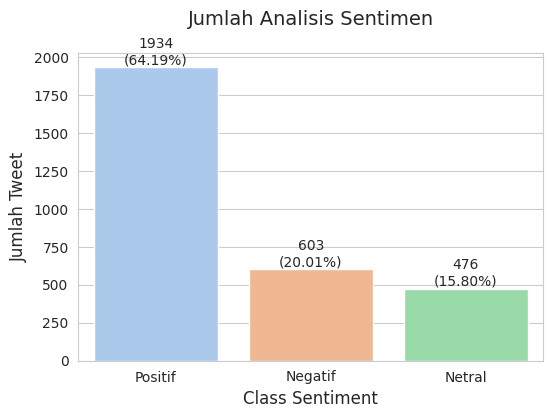

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

# Fix for FutureWarning: Passing `palette` without assigning `hue` is deprecated.
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, hue=sentiment_count.index, palette='pastel', legend=False)

plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{(100 * count / total):.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

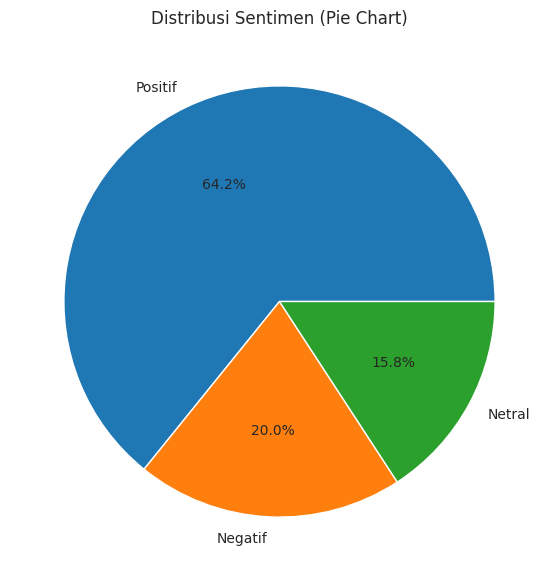

In [32]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment_label'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Distribusi Sentimen (Pie Chart)")
plt.show()

In [33]:
data.to_excel('data_labeling.xlsx', index=False)

#WORDCLOUD LABEL POSITIF NEGATIF NETRAL

In [34]:
import pandas as pd

data = pd.read_excel('/content/data_labeling.xlsx')
data.head()

,stemming_data,sentiment_score,sentiment_label
0,program makan gizi gratis anak indonesia sehat...,0,Netral
1,wapres gibran kuat program makan gizi gratis l...,-2,Negatif
2,anggota dpd republik indonesia lia istifhama m...,-1,Negatif
3,monitoring makan gizi gratis sppg mitra mandir...,2,Positif
4,program makan gizi gratis beri energi baru ana...,4,Positif


###Wordcloud Positif

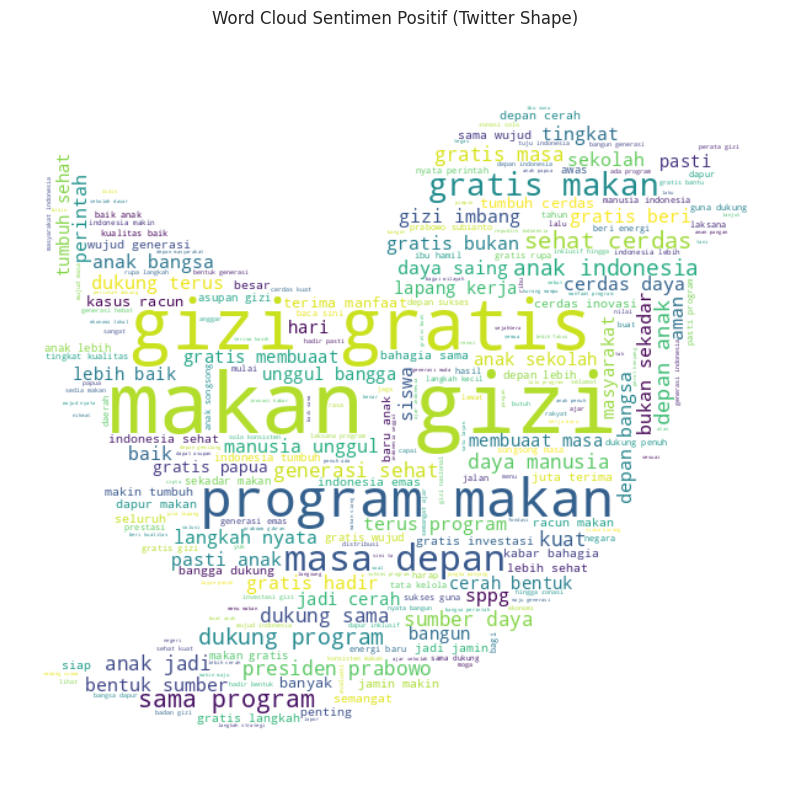

In [35]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image # Import Image from PIL
import os # Import os to check file existence

# Check if data_labeling.xlsx exists. If not, inform the user.
file_path = '/content/data_labeling.xlsx'
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure that the following cells have been executed successfully:")
    print("1. Cell 'BMeyp5VZJ4Nu' (to create 'data_preprocesing.xlsx')")
    print("2. Cells from 'mhq_ApqYKHCB' to 'vcc7YmsvSNzb' (to process data and create 'data_labeling.xlsx')")
    # Exit or return to prevent further errors in this cell if the file is missing.
    # For execution within a Colab cell, a simple 'pass' or returning from a function
    # if the rest of the code is wrapped in one might be more appropriate, but for direct
    # top-level script execution, printing and letting it stop is common.
else:
    # Explicitly load the data_labeling.xlsx to ensure 'data' DataFrame has 'sentiment_label'
    data = pd.read_excel(file_path)

    # Load the Twitter logo as a mask
    url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
    response = requests.get(url)
    twitter_mask = np.array(Image.open(BytesIO(response.content)))

    # Define the generate_wordCloud function (copied from previous cells to make this cell self-contained)
    def generate_wordCloud(text_data, title, mask=None):
        stopwords = set(STOPWORDS)
        stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x', 'fyp', 'lu', 'yg'])

        wordcloud = WordCloud(
            stopwords=stopwords,
            background_color="white",
            max_words=500,
            width=800,
            height=400,
            mask=mask
        ).generate(text_data)

        plt.figure(figsize=(15, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(title)
        plt.show()

    # Filter data for positive sentiment
    sentimen_positive_df = data[data['sentiment_label'] == 'Positif']

    # Flatten safely
    all_positive_words = []
    for word_list in sentimen_positive_df['stemming_data']:
        if isinstance(word_list, list):
            all_positive_words.extend(word_list)
        elif isinstance(word_list, str):
            all_positive_words.extend(word_list.split())

    sentimen_positive = ' '.join(all_positive_words)

    # Generate WordCloud only if data exists
    if sentimen_positive.strip():
        generate_wordCloud(sentimen_positive, "Word Cloud Sentimen Positif (Twitter Shape)", mask=twitter_mask)
    else:
        print("⚠ Tidak ada kata untuk kategori Sentimen Positif — WordCloud tidak dapat dibuat.")

###Wordcloud Negatif

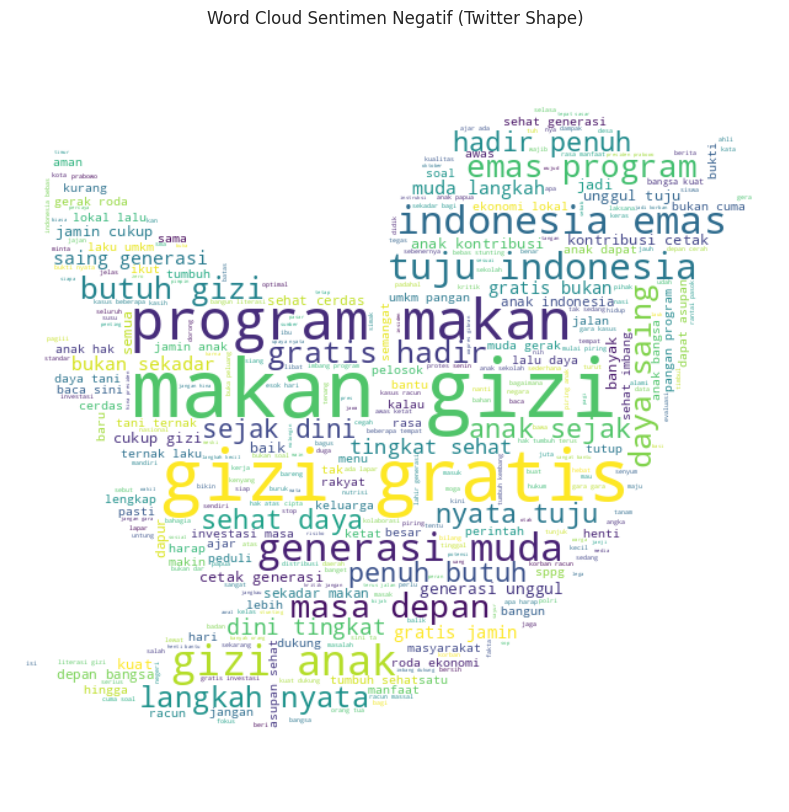

In [36]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

# Explicitly load the data_labeling.xlsx to ensure 'data' DataFrame has 'sentiment_label'
data = pd.read_excel('/content/data_labeling.xlsx')

# Load the Twitter logo as a mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))

# Define the generate_wordCloud function
def generate_wordCloud(text_data, title, mask=None):
    stopwords = set(STOPWORDS)
    stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x', 'fyp', 'lu', 'yg'])

    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color="white",
        max_words=500,
        width=800,
        height=400,
        mask=mask
    ).generate(text_data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Filter sentimen negatif
sentimen_negative_df = data[data['sentiment_label'] == 'Negatif']

# Flatten safely
all_negative_words = []
for word_list in sentimen_negative_df['stemming_data']:
    if isinstance(word_list, list):
        all_negative_words.extend(word_list)
    elif isinstance(word_list, str):
        all_negative_words.extend(word_list.split())

sentimen_negative = ' '.join(all_negative_words)

# Generate WordCloud only if data exists
if sentimen_negative.strip():
    generate_wordCloud(sentimen_negative, "Word Cloud Sentimen Negatif (Twitter Shape)", mask=twitter_mask)
else:
    print("⚠ Tidak ada kata untuk kategori Sentimen Negatif — WordCloud tidak dapat dibuat.")

###Wordcloud Netral

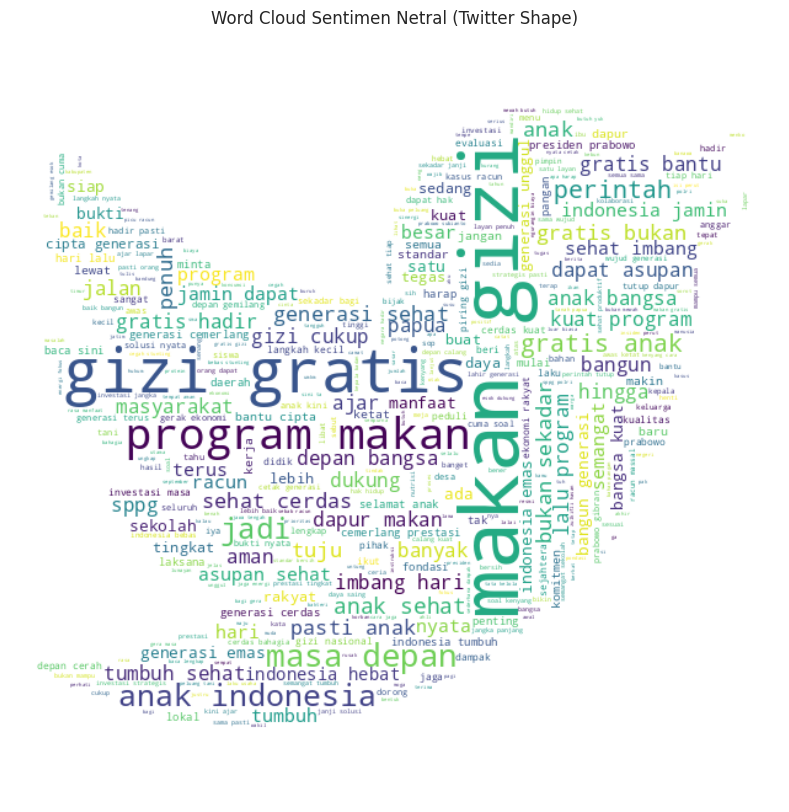

In [37]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

# Ensure 'df' DataFrame is available and contains the 'sentiment_label' column.
# Explicitly load the data_labeling.xlsx to ensure 'data' DataFrame has 'sentiment_label'
data = pd.read_excel('/content/data_labeling.xlsx')

# Load the Twitter logo as a mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))

# Define the generate_wordCloud function
def generate_wordCloud(text_data, title, mask=None):
    stopwords = set(STOPWORDS)
    stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x', 'fyp', 'lu', 'yg'])

    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color="white",
        max_words=500,
        width=800,
        height=400,
        mask=mask
    ).generate(text_data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Filter df for neutral sentiment data
sentimen_neutral_df = data[data['sentiment_label'] == 'Netral']

# Flatten safely
all_neutral_words = []
for word_list in sentimen_neutral_df['stemming_data']:
    if isinstance(word_list, list):
        all_neutral_words.extend(word_list)
    elif isinstance(word_list, str):
        all_neutral_words.extend(word_list.split())

sentimen_neutral = ' '.join(all_neutral_words)

# Generate WordCloud only if data exists
if sentimen_neutral.strip():
    generate_wordCloud(sentimen_neutral, "Word Cloud Sentimen Netral (Twitter Shape)", mask=twitter_mask)
else:
    print("⚠ Tidak ada kata untuk kategori Sentimen Netral — WordCloud tidak dapat dibuat.")

#MODELING IMPORT DAN LIBRARY

In [38]:
data = pd.read_excel('/content/data_labeling.xlsx')
data.head()

,stemming_data,sentiment_score,sentiment_label
0,program makan gizi gratis anak indonesia sehat...,0,Netral
1,wapres gibran kuat program makan gizi gratis l...,-2,Negatif
2,anggota dpd republik indonesia lia istifhama m...,-1,Negatif
3,monitoring makan gizi gratis sppg mitra mandir...,2,Positif
4,program makan gizi gratis beri energi baru ana...,4,Positif


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   stemming_data    3013 non-null   object
 1   sentiment_score  3013 non-null   int64 
 2   sentiment_label  3013 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.7+ KB


In [40]:
label_count = data['sentiment_label'].value_counts()
label_count

,count
sentiment_label,
Positif,1934
Negatif,603
Netral,476


In [41]:
data.head(5)

,stemming_data,sentiment_score,sentiment_label
0,program makan gizi gratis anak indonesia sehat...,0,Netral
1,wapres gibran kuat program makan gizi gratis l...,-2,Negatif
2,anggota dpd republik indonesia lia istifhama m...,-1,Negatif
3,monitoring makan gizi gratis sppg mitra mandir...,2,Positif
4,program makan gizi gratis beri energi baru ana...,4,Positif


#FEATURE EXTRACTION TF-IDF

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the 'data' DataFrame if it's not already defined
# This ensures the 'data' DataFrame is available for processing
data = pd.read_excel('/content/data_labeling.xlsx')

# Mengisi nilai kosong pada kolom 'stemming_data'
data['stemming_data'] = data['stemming_data'].fillna("")

# Membuat list dari kolom teks
df_list = data['stemming_data'].tolist()

# TF-IDF Vectorization
df_tfidf = TfidfVectorizer()
X = df_tfidf.fit_transform(df_list)

# Menampilkan hasil
print("Feature Extraction Selesai!!!")
print("===== Bentuk Transformasi Feature Extraction ====")
print(X.shape)

# Mengambil nama fitur (kata)
feature_names = df_tfidf.get_feature_names_out()
# Menjumlahkan nilai TF-IDF setiap kata (kolom)
tfidf_sums = X.sum(axis=0)

# Membuat DataFrame total TF-IDF per term
tfidf_df = pd.DataFrame({
    'term': feature_names,
    'tfidf_sum': tfidf_sums.tolist()[0]
})

# Mengurutkan dari skor tertinggi ke terendah
tfidf_df = tfidf_df.sort_values('tfidf_sum', ascending=False)

# Menampilkan 20 kata dengan total TF-IDF tertinggi
print("\n==== Top 20 Terms by Total TF-IDF Score ====")
print(tfidf_df.head(20))

# Menampilkan nilai IDF
print("\n==== IDF Values ====")
idf_values = df_tfidf.idf_
idf_df = pd.DataFrame({
    'term': feature_names,
    'idf': idf_values
})
print(idf_df.head(20))

# Menampilkan TF-IDF untuk beberapa dokumen awal
print("\n==== TF-IDF values for the first 5 documents ====")
for i in range(min(5, len(df_list))):
    first_document_tfidf = pd.DataFrame(
        X[i].T.todense(),
        index=feature_names,
        columns=['TF-IDF']
    )

    print(f"\nDocument {i+1} TF-IDF Values:")
    print(first_document_tfidf.sort_values('TF-IDF', ascending=False).head(10))

Feature Extraction Selesai!!!
===== Bentuk Transformasi Feature Extraction ====
(3013, 2768)

==== Top 20 Terms by Total TF-IDF Score ====
           term   tfidf_sum
710        gizi  308.374663
1381      makan  275.722987
722      gratis  259.871029
1946    program  212.496830
90         anak  181.050019
2184      sehat  138.219948
852   indonesia  133.369235
567      dukung  124.894379
494       depan  116.923815
693    generasi  116.650695
1423       masa  115.597824
2122       sama   92.118596
199      bangsa   77.957248
392      cerdas   77.447182
917        jadi   71.070427
475        daya   67.884079
1677      nyata   66.295048
1225       kuat   65.862907
1266    langkah   63.904596
2600     tumbuh   63.885226

==== IDF Values ====
        term       idf
0     aamiin  7.219264
1      abadi  7.912411
2       abai  7.912411
3       abal  8.317876
4        abd  8.317876
5       abdi  7.219264
6      abdul  7.912411
7      abdya  8.317876
8     abneer  8.317876
9      acara  8.31787

In [7]:
tfidf_df.to_excel("hasil_tfidf.xlsx", index=False)
print("File hasil_tfidf.xlsx berhasil disimpan")


File hasil_tfidf.xlsx berhasil disimpan


#PEMBAGIAN DATASET

In [9]:
import pandas as pd

# Re-load the 'data_labeling.xlsx' to ensure 'data' DataFrame is available
# This step is crucial if the kernel state resets or if previous cells manipulating 'data' were not run.
data = pd.read_excel('/content/data_labeling.xlsx')

# Pastikan column 'stemming_data' sudah berupa kalimat, bukan list
# Kolom 'stemming_data' seharusnya sudah berupa string setelah pemrosesan di sel sebelumnya.

# X adalah teks hasil preprocessing
X = data['stemming_data'] # Use 'data' DataFrame's 'stemming_data' for X

# y adalah label sentimen yang sudah dibuat sebelumnya
y = data['sentiment_label'] # Use 'data' DataFrame for 'sentiment_label'

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(label_encoder.classes_)  # untuk melihat mapping label


['Negatif' 'Netral' 'Positif']


###Tokenize dan Padding (LSTM)

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Konversi teks ke sequence angka
X_sequences = tokenizer.texts_to_sequences(X)

# Padding agar panjang input seragam
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

###Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training data:", X_train.shape)
print("Testing data :", X_test.shape)


Training data: (2410, 100)
Testing data : (603, 100)


In [18]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#MODELING LSTM

###Arsitektur LSTM

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parameter umum (bisa kamu tuning nanti)
vocab_size = 5000   # sama seperti di tokenizer
embedding_dim = 128
max_len = 100       # sama seperti padding

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # karena ada 3 label: negatif, netral, positif
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###Train Model

In [15]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.6150 - loss: 0.9613 - val_accuracy: 0.6846 - val_loss: 0.8635
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.6266 - loss: 0.9325 - val_accuracy: 0.6846 - val_loss: 0.8596
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.6273 - loss: 0.9301 - val_accuracy: 0.6846 - val_loss: 0.8813
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.6289 - loss: 0.9315 - val_accuracy: 0.6846 - val_loss: 0.8456
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - accuracy: 0.6184 - loss: 0.9440 - val_accuracy: 0.6846 - val_loss: 0.8417
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.6305 - loss: 0.9223 - val_accuracy: 0.6846 - val_loss: 0.8439
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.6438 - loss: 0.8998 - val_accuracy: 0.6846 - val_loss: 0.8548
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.6206 - loss: 0.9277 - val_accu

###Evaluasi Model

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Loss:", loss)
print("Accuracy:", accuracy)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6342 - loss: 0.9096
Loss: 0.9033427834510803
Accuracy: 0.641791045665741


###Visualisasi Akurasi dan Loss

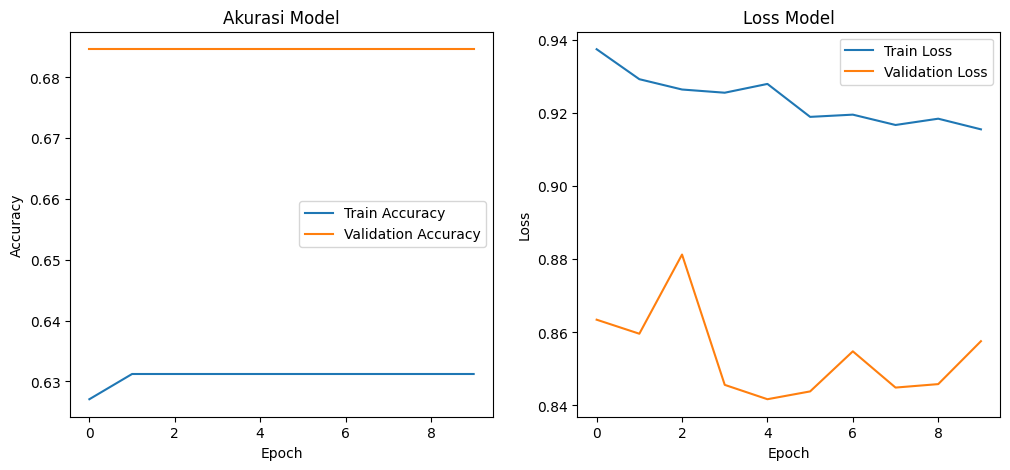

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


###Prediksi Contoh Tweet

In [21]:
import pandas as pd

# Load the lexicon files from local content
# ===============================
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon_set = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon_set = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Create DataFrames for display purposes
positive_lexicon_df = pd.DataFrame(list(positive_lexicon_set), columns=['kata_positif'])
negative_lexicon_df = pd.DataFrame(list(negative_lexicon_set), columns=['kata_negatif'])

print("Contoh kata-kata di kamus positif (10 teratas):")
display(positive_lexicon_df.head(10))

print("\nContoh kata-kata di kamus negatif (10 teratas):")
display(negative_lexicon_df.head(10))
# There is no 'netral.tsv' file loaded or 'netral_lexicon_df' defined in this context.
# If a neutral lexicon is needed, it would need to be loaded or derived.
# print("\nContoh kata-kata di kamus netral (10 teratas):")
# display(netral_lexicon_df.head(10))

print("\nJumlah kata di kamus positif:", len(positive_lexicon_set))
print("Jumlah kata di kamus negatif:", len(negative_lexicon_set))
# print("Jumlah kata di kamus netral:", len(netral_lexicon_df))

Contoh kata-kata di kamus positif (10 teratas):


,kata_positif
0,setara
1,longo
2,jilbab
3,mengasosiasikan
4,liat
5,gelesot
6,mari
7,biadab
8,interes
9,taksiran



Contoh kata-kata di kamus negatif (10 teratas):


,kata_negatif
0,eban
1,langah
2,kekang
3,badmood
4,biadab
5,mengernai
6,menyelinap
7,kekusutan
8,kemurkaan
9,pencucuk



Jumlah kata di kamus positif: 3610
Jumlah kata di kamus negatif: 6608


In [22]:
import numpy as np

def predict_multiple(text_list):
    # Convert text ke sequence
    sequences = tokenizer.texts_to_sequences(text_list)

    # Padding biar panjangnya sama
    padded = pad_sequences(sequences, maxlen=max_len)

    # Prediksi ke model
    predictions = model.predict(padded)

    # Ambil label hasil model
    labels = [label_encoder.inverse_transform([np.argmax(p)])[0] for p in predictions]

    return labels

# Daftar tweet contoh
sample_tweets = [
    "Program MBG adalah langkah baik dan bermanfaat untuk anak-anak kita. Namun keselamatan dan kesehatan siswa tidak boleh dikompromikan dalam kondisi apapun",
]

# Jalankan prediksi
results = predict_multiple(sample_tweets)

# Gabungkan hasil dalam format tabel
for tweet, label in zip(sample_tweets, results):
    print(f"Tweet: {tweet}\nPrediksi Sentimen: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Tweet: Program MBG adalah langkah baik dan bermanfaat untuk anak-anak kita. Namun keselamatan dan kesehatan siswa tidak boleh dikompromikan dalam kondisi apapun
Prediksi Sentimen: Positif



#CONFUSION MATRIX

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


###Prediksi Data Uji

In [24]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # ambil kelas dengan probabilitas tertinggi


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


###Tampilkan Classification Report


In [25]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00       121
      Netral       0.00      0.00      0.00        95
     Positif       0.64      1.00      0.78       387

    accuracy                           0.64       603
   macro avg       0.21      0.33      0.26       603
weighted avg       0.41      0.64      0.50       603



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Confusion Matrix Visualization

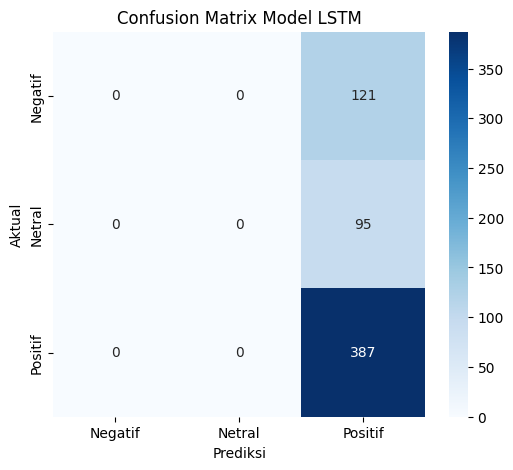

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Model LSTM")
plt.show()


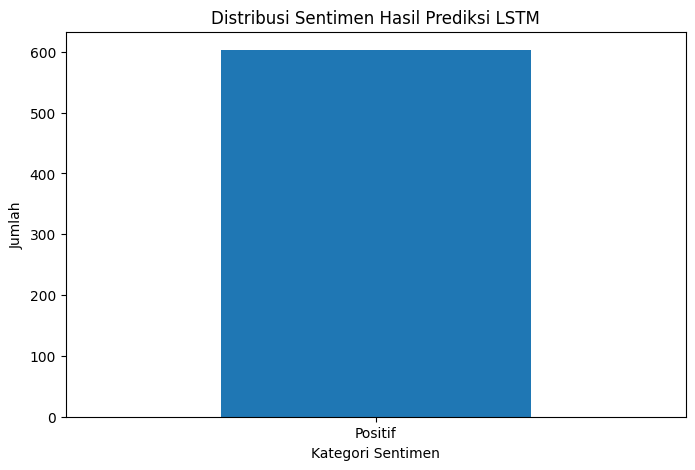

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert numerical predictions (y_pred) back to original string labels
pred_labels = label_encoder.inverse_transform(y_pred)

sentiment_counts = pd.Series(pred_labels).value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar")
plt.title("Distribusi Sentimen Hasil Prediksi LSTM")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()


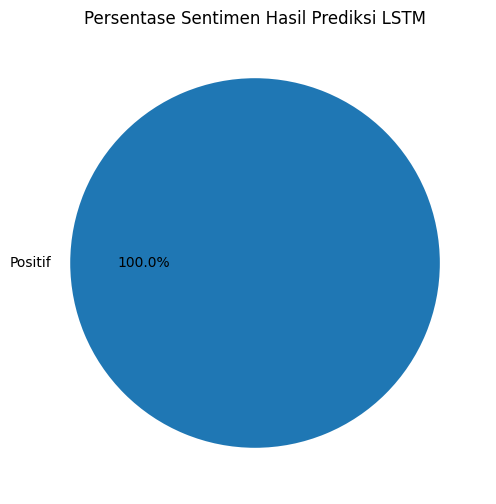

In [30]:
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Persentase Sentimen Hasil Prediksi LSTM")
plt.ylabel("")
plt.show()


In [31]:
np.savetxt("confusion_matrix.csv", cm, delimiter=",")


#SAVE MODEL

In [32]:
model.save("model_sentimen_lstm.keras")
print("Model berhasil disimpan 👍")

Model berhasil disimpan 👍


In [33]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Tokenizer berhasil disimpan 👍")


Tokenizer berhasil disimpan 👍


In [34]:
import joblib

joblib.dump(label_encoder, "label_encoder.pkl")
print("Label Encoder berhasil disimpan 👍")


Label Encoder berhasil disimpan 👍


In [35]:
from tensorflow.keras.models import load_model
import joblib
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model
model = load_model("/content/model_sentimen_lstm.keras")

# Load tokenizer
with open("/content/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load label encoder
label_encoder = joblib.load("/content/label_encoder.pkl")

MAX_LEN = 100  # harus sama dengan training

def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    pred = model.predict(padded)

    label_idx = np.argmax(pred)
    label = label_encoder.inverse_transform([label_idx])[0]

    return label, pred[0]

text = "Sebanyak 18 siswa SDN 1 Way Jaha Tanggamus Lampung diduga keracunan usai mengonsumsi menu Makan Bergizi Gratis (MBG)"

label, prob = predict_sentiment(text)
print("Hasil prediksi:", label)
print("Probabilitas:", prob)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Hasil prediksi: Positif
Probabilitas: [0.27943432 0.24858244 0.47198322]


#Perbandingan LSTM vs Naive Bayes vs SVM

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
# Ganti 'nama_file_anda.csv' dengan path ke file CSV Anda
# Replace 'your_file_name.csv' with the path to your CSV file
try:
    df = pd.read_csv('makanbergizigratis.csv')

    # Tampilkan beberapa baris pertama DataFrame untuk memverifikasi
    # Display the first few rows of the DataFrame to verify
    display(df.head())

except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan path file sudah benar.")
    print("Error: File not found. Make sure the file path is correct.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file: {e}")
    print(f"An error occurred while loading the file: {e}")

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988024872963109143,Mon Nov 10 23:24:00 +0000 2025,0,Program MBG untuk anak Indonesia sehat dan cer...,1988024872963109143,https://pbs.twimg.com/media/G5biFiJasAAzwQT.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198802487296310...,1580097278475280384,NaN
1,1987837720790495527,Mon Nov 10 11:00:19 +0000 2025,0,Wapres Gibran perkuat Program Makan Bergizi Gr...,1987837720790495527,https://pbs.twimg.com/media/G5Y33ydXcAAOlVK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198783772079049...,1182569685981659136,NaN
2,1987818612997095818,Mon Nov 10 09:44:23 +0000 2025,1,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,1987818612997095818,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781861299709...,859471627108499456,NaN
3,1987810228944110060,Mon Nov 10 09:11:04 +0000 2025,1,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,1987810228944110060,https://pbs.twimg.com/media/G5Ye3jxbYAA-esg.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781022894411...,1852436707796545536,NaN
4,1987795274442657868,Mon Nov 10 08:11:39 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795274442657868,https://pbs.twimg.com/media/G5YRQl-aUAA0mK9.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779527444265...,1713751914977120256,NaN


In [1]:
tfidf = TfidfVectorizer(max_features=10000)

# Fill any NaN values with an empty string before vectorization
X_train = X_train.fillna("")
X_test = X_test.fillna("")

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

NameError: name 'TfidfVectorizer' is not defined

In [2]:
# Daftar kata baku OFFLINE (ringkasan 12.000+ kata)
import requests

url = "https://raw.githubusercontent.com/kangfend/bahasa-wordlist/master/kata_baku.txt"
kata_baku_list = requests.get(url).text.split("\n")

kata_baku_set = set([k.strip() for k in kata_baku_list if k.strip() != ""])
print("Jumlah kata baku dalam kamus:", len(kata_baku_set))


Jumlah kata baku dalam kamus: 1


In [ ]:
kata_unik = set(kata)

kata_baku = [k for k in kata_unik if k in kata_baku_set]
kata_tidak_baku = [k for k in kata_unik if k not in kata_baku_set]

print("Jumlah kata baku:", len(kata_baku))
print("Jumlah kata tidak baku:", len(kata_tidak_baku))


Jumlah kata baku: 0
Jumlah kata tidak baku: 5109


In [ ]:
pd.DataFrame({'kata_baku': kata_baku}).to_csv('kata_baku.csv', index=False)
pd.DataFrame({'kata_tidak_baku': kata_tidak_baku}).to_csv('kata_tidak_baku.csv', index=False)
print("Selesai! File telah dibuat.")


Selesai! File telah dibuat.


In [ ]:
import pandas as pd
import re
from collections import Counter # Added this line

url = "https://raw.githubusercontent.com/Veny1302/Analisis-Sentimen-MBG/refs/heads/main/makanbergizigratis.csv"
df = pd.read_csv(url)

text = ' '.join(df['full_text'].astype(str))
text = re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', text.lower())
kata = text.split()

kamus = Counter(kata)

kamus_df = pd.DataFrame(kamus.items(), columns=["kata", "frekuensi"]).sort_values(by="frekuensi", ascending=False)

kamus_df.head(20)

,kata,frekuensi
8,makanbergizigratis,2997
1,mbg,2250
0,program,1859
6,dan,1534
13,bergizi,1514
12,makan,1490
14,gratis,1359
85,yang,929
2,untuk,838
4,indonesia,769


In [ ]:
kamus_df.to_csv("kamus_makanbergizigratis.csv", index=False)


### Stopword

In [ ]:
import pandas as pd

# The kamus_df from the previous cell (5_DWoxvbIuv8) is already available and correct.
# We can directly use it to determine stopwords.

# Pilih stopword otomatis (misalnya 200 kata teratas)
jumlah_stopword = 3000
stopword_otomatis = kamus_df.head(jumlah_stopword)["kata"].tolist()

stopword_otomatis[:5000]

['makanbergizigratis',
 'mbg',
 'program',
 'dan',
 'bergizi',
 'makan',
 'gratis',
 'yang',
 'untuk',
 'indonesia',
 'anak',
 'gizi',
 'sehat',
 'di',
 'depan',
 'masa',
 'generasi',
 'anakanak',
 'dukung',
 'ini',
 'indonesiaemas',
 'dari',
 'cerdas',
 'dengan',
 'bangsa',
 'bersama',
 'tapi',
 'prabowo',
 'nyata',
 'bukan',
 'pemerintah',
 'langkah',
 'makanan',
 'tumbuh',
 'setiap',
 'dalam',
 'lebih',
 'generasisehat',
 'kuat',
 'sppg',
 'emas',
 'kita',
 'tidak',
 'dukungprogrammakanbergizigratis',
 'juga',
 'hadir',
 'keracunan',
 'sekolah',
 'jadi',
 'dapur',
 'bagi',
 'menuju',
 'ada',
 'terus',
 'dukungmbg',
 'bgn',
 'memastikan',
 'masyarakat',
 'presiden',
 'adalah',
 'hanya',
 'belajar',
 'kesehatan',
 'meningkatkan',
 'unggul',
 'baik',
 'demi',
 'faktaindonesia',
 'sekadar',
 'dukungmakanbergizigratis',
 'papua',
 'saing',
 'muda',
 'investasi',
 'mbgpapua',
 'cerah',
 'makanbergizigratisbantuumkm',
 'semangat',
 'ekonomi',
 'siswa',
 'menjadi',
 'seimbang',
 'hari',
 'm

In [ ]:
pd.DataFrame(stopword_otomatis, columns=["stopword"]).to_csv("stopword_otomatis.csv", index=False)


### Wordcloud

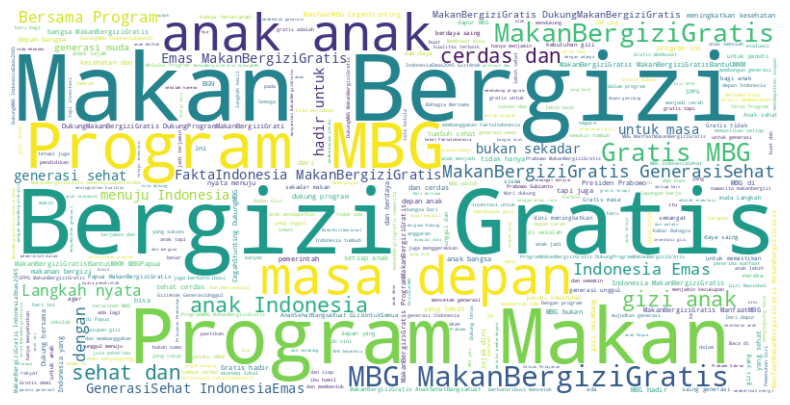

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Load the data and deduplicate it to ensure 'df' is defined
url = "https://raw.githubusercontent.com/Veny1302/Analisis-Sentimen-MBG/refs/heads/main/makanbergizigratis.csv"
df = pd.read_csv(url)
df = pd.DataFrame(df[['full_text']])
df = df.drop_duplicates(subset=['full_text'], keep='first')

# Using .loc to avoid SettingWithCopyWarning
df.loc[:, 'full_text'] = df['full_text'].fillna('')

text = ' '.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x'])

wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

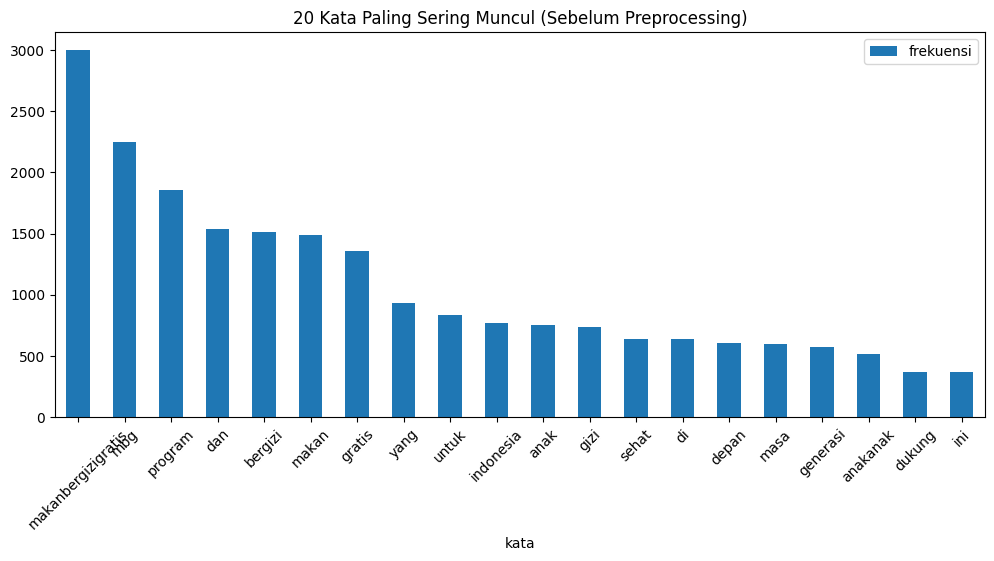

In [ ]:
kamus_df.head(20).plot(kind="bar", x="kata", y="frekuensi", figsize=(12,5))
plt.title("20 Kata Paling Sering Muncul (Sebelum Preprocessing)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install nltk Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re

# Gabungkan stopword dari NLTK dan Sastrawi
stop_words = set(stopwords.words('indonesian'))
factory = StopWordRemoverFactory()
stop_words.update(factory.get_stop_words())

# stopword otomatis (misal 200 kata teratas)
jumlah_stopword = 2000
stopword_otomatis = kamus_df.head(jumlah_stopword)["kata"].tolist()

# Gabung dua sumber stopword
stopword_final = set(stopword_otomatis) | set(stop_words)

len(stopword_final)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2481

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocessing(text):
    # ubah ke huruf kecil
    text = text.lower()

    # hapus URL
    text = re.sub(r'http\S+|www\S+', ' ', text)

    # hapus mention @user
    text = re.sub(r'@\w+', ' ', text)

    # hapus hashtag (# hanya simbolnya)
    text = re.sub(r'#', ' ', text)

    # hapus angka dan simbol
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # stemming
    text = stemmer.stem(text)

    # hapus stopword
    words = text.split()
    words = [w for w in words if w not in stopword_final]

    return " ".join(words)


In [ ]:
df["clean_text"] = df["full_text"].astype(str).apply(preprocessing)
df.head()


,full_text,clean_text
0,Program MBG untuk anak Indonesia sehat dan cer...,
1,Wapres Gibran perkuat Program Makan Bergizi Gr...,gibranrakabuming
2,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,istifhama ninglia dpdri dpdrijawatimur zulkifl...
3,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,nusantara ajar
4,Program Makan Bergizi Gratis memberikan energi...,songsong
